In [0]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt

In [0]:
class Client_Twitter(object):
  
    def __init__(self): 
            
            
            consumer_key = ''
            consumer_secret = ''
            access_token = ''
            access_token_secret = ''

           
            try: 
                 
                self.auth = OAuthHandler(consumer_key, consumer_secret) 
                
                self.auth.set_access_token(access_token, access_token_secret) 
                
                self.api = tweepy.API(self.auth) 
            except: 
                print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        
       
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
    
    def get_tweet_sentiment(self, tweet): 
     
        
        analysis = TextBlob(self.clean_tweet(tweet)) 
       
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
    
    def get_tweets(self, query, count = 100): 
       
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
         
            fetched_tweets = self.api.search(q = query, count = count)
            #print(fetched_tweets[0].text)
          
            for tweet in fetched_tweets: 
                
                parsed_tweet = {} 
             
                parsed_tweet['text'] = tweet.text
                
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                
                if tweet.retweet_count > 0: 
                    
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [0]:
def main(): 
    
    api = TwitterClient() 
    
    tweets = api.get_tweets(query = 'jetblue', count = 200) 
   
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
   
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
   
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
   
    print("Neutral tweets percentage: {} % \ ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 
    explode = (0.1, 0, 0)
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [100*len(ptweets)/len(tweets), 100*len(ntweets)/len(tweets), 100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, explode=explode, labels=labels,startangle=140)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
  
  
   
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
  
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 


Positive tweets percentage: 25.58139534883721 %
Negative tweets percentage: 20.930232558139537 %
Neutral tweets percentage: 53.48837209302326 % \ 


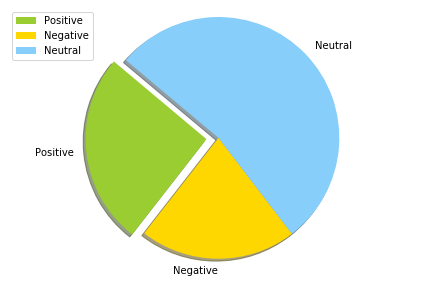



Positive tweets:
RT @endofbellcurve: @coffeespoonie @JetBlue Pretty telling, @JetBlue that wheelchair repair/replacement isn't obviously in your 'customer b…
RT @Will_Graham_Pls: @coffeespoonie @JetBlue @JetBlue replace the wheel chair. It's almost been a full year of these shenanigans
RT @mis_cue: @coffeespoonie @JetBlue @JetBlue TIL that you *still* don't care about disabled people, their (legally-mandated) right to acce…
JetBlue reports its third quarter earnings, operating expense growth better than guidance
@JetBlue #JetblueAirways… https://t.co/FRY8uPcrFg
@JetBlue is by far the best airline! It’s not even close!!! Why are other airlines failing so badly?!?! I have an o… https://t.co/uNAcMYUfvt
RT @taeslaynee: A member of the JetBlue paternity this is true 🤣🤣 https://t.co/ZIYsxtKQ8x
RT @RearAdBsBlog: Shoutout to @JetBlue for getting us home early. (Though I kinda wanna stick around for the end of COLLATERAL.) https://t.…
@coffeespoonie @JetBlue Oh man...still?!? Tsk tsk @jetblue

In [20]:
if __name__ == "__main__": 
   
    main() 